In [18]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
import qutip as qt
import sympy as sym


%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.4f}'.format})

In [68]:
ω_f = 20
ω_r = 19
g_q = 0.1
g_Φ = 0.01
ω_δ = ω_f-ω_r

In [69]:
N = 20

In [70]:
M = np.zeros([2*N, 2*N])
for i in range(2*N):
    for j in range(2*N):
        if i==j:
            if i<N:
                M[i,j] = +ω_δ
            else:
                M[i,j] = -ω_δ
        if i == j+N or j == i+N:
            M[i,j] = g_Φ
        if i == j+1 or j == i+1:
            try:
                M[i,j] = g_q
            except:
                continue
        if i == j+N-1 or j == i+N-1:
            try:
                M[i,j] = g_q
            except:
                continue
        if i == j+N+1 or j == i+N+1:
            try:
                M[i,j] = g_q
            except:
                continue
M[N-1,N] = M[N,N-1] = 0
M[0,N-1] = M[N-1,0] = 0
M[N,2*N-1] = M[2*N-1,N] = 0

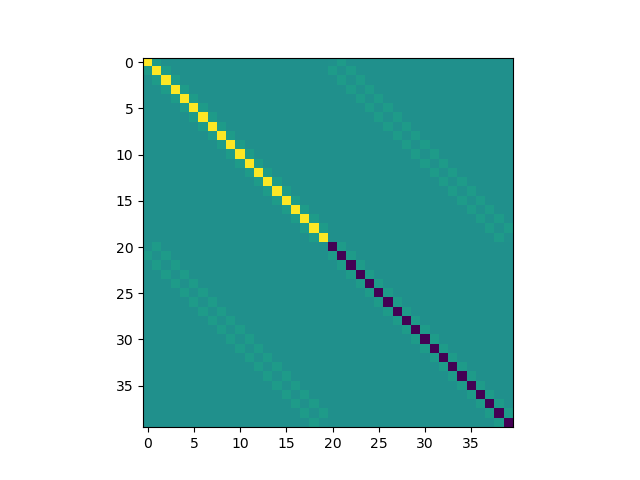

In [71]:
fig, ax = plt.subplots()
ax.imshow(M)
fig.show()
plt.close('all')

In [72]:
def fourier_transform(A):
    """
    Apply the Fourier transform to matrix A
    N: Number of unit cells
    """
    N = len(A)
    k_values = np.linspace(-np.pi, np.pi, N, endpoint=False)  # Define k-space
    A_k = np.zeros_like(A, dtype=complex)

    for k in k_values:
        # Construct the transformation matrix for this k
        T_k = np.array([[np.exp(1j * k * i) if i == j else 0 for j in range(N)] for i in range(N)])
        T_k_dagger = np.conjugate(T_k.T)

        # Transform A into k-space
        A_k += T_k @ A @ T_k_dagger
    
    return A_k / len(k_values)

M_k = fourier_transform(M)

In [73]:
M_k = np.fft.fft2(M)

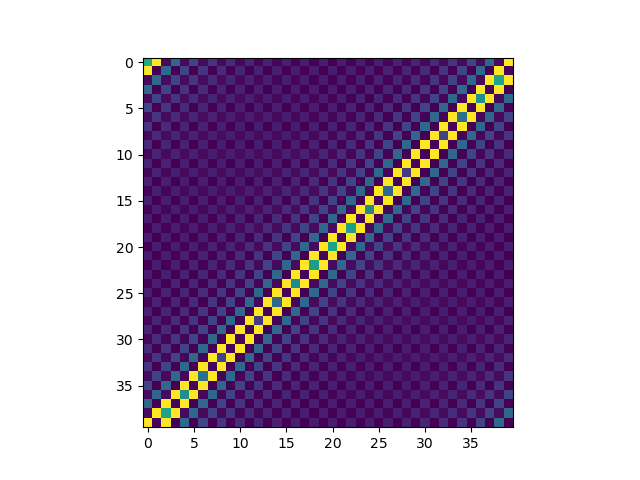

In [74]:
fig, ax = plt.subplots()
ax.imshow(np.abs(M_k))
fig.show()
plt.close('all')

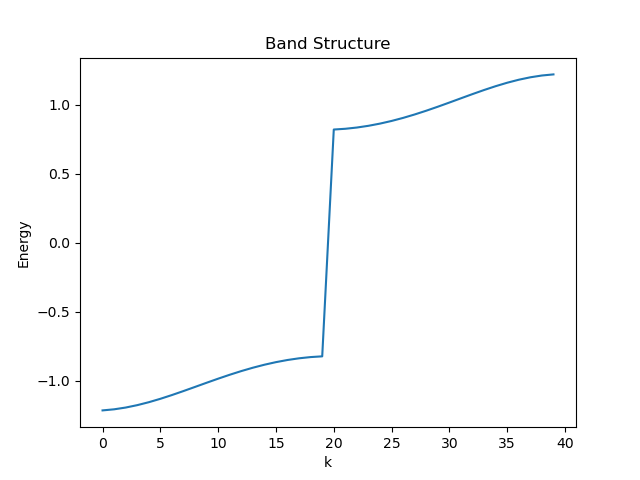

In [80]:
# eigenvalues, eigenvectors = np.linalg.eigh(M_k)
eigenvalues, eigenvectors = np.linalg.eigh(M)

# Plotting the band structure
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(eigenvalues)
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Band Structure')
plt.show()

In [4]:
ω_f = 20
ω_r = 1
g_q = 0.1
g_Φ = 0.1
ω_δ = ω_f-ω_r

In [5]:
g_q_by_ω_δ_values = np.geomspace(1e-1, 1e1, 10)
g_Φ_by_g_q_values = np.geomspace(1e-1, 1e1, 10)

In [54]:
k = np.linspace(-np.pi, np.pi, 100)
H_k = np.zeros([len(g_q_by_ω_δ_values), len(g_Φ_by_g_q_values), len(k), 2, 2], dtype=np.complex128)
E_k = np.zeros([len(g_q_by_ω_δ_values), len(g_Φ_by_g_q_values), len(k), 2], dtype=np.complex128)
for l in range(len(g_q_by_ω_δ_values)):
    for m in range(len(g_Φ_by_g_q_values)):
        for i in range(len(k)):
            H_k[l, m, i, 0, 0] =  1                                                 + 2 * np.cos(k[i]) * g_q_by_ω_δ_values[l]
            H_k[l, m, i, 0, 1] =  1j *( g_Φ_by_g_q_values[m]*g_q_by_ω_δ_values[l]   + 2 * np.cos(k[i]) * g_q_by_ω_δ_values[l])
            H_k[l, m, i, 1, 0] = -1j *( g_Φ_by_g_q_values[m]*g_q_by_ω_δ_values[l]   + 2 * np.cos(k[i]) * g_q_by_ω_δ_values[l])
            H_k[l, m, i, 1, 1] = -1                                                 + 2 * np.cos(k[i]) * g_q_by_ω_δ_values[l]
    
            E_k[l, m, i, :] = np.linalg.eig(H_k[l, m, i,:])[0]

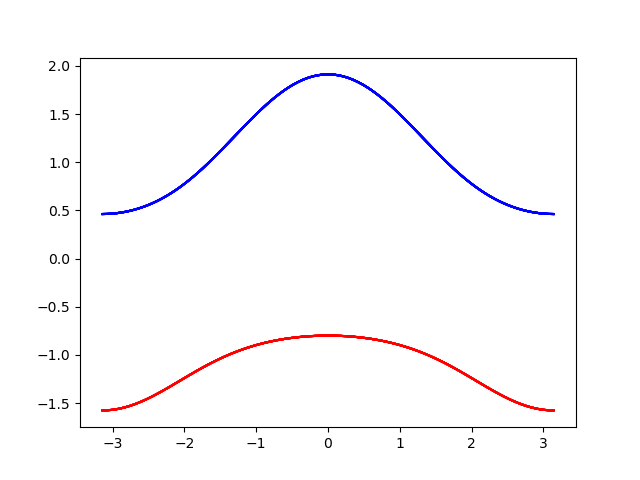

In [55]:
fig, ax = plt.subplots()
for l in range(len(g_q_by_ω_δ_values)):
        ax.plot(k, E_k[2 , 5, :, 0], 'b')
        ax.plot(k, E_k[2 , 5, :, 1], 'r')
fig.show()
plt.close('all')

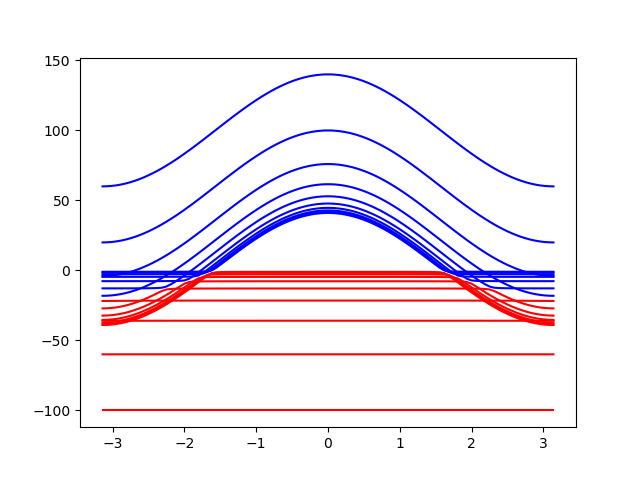

In [56]:
fig, ax = plt.subplots()
for m in range(len(g_Φ_by_g_q_values)):
        ax.plot(k, E_k[-1, m, :, 0], 'b')
        ax.plot(k, E_k[-1, m, :, 1], 'r')
fig.show()
plt.close('all')

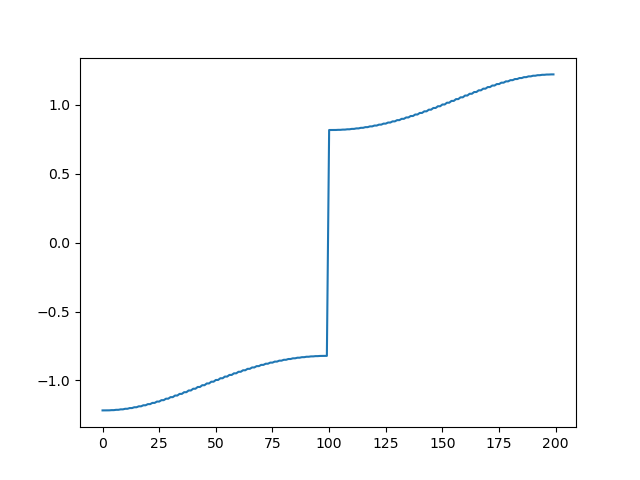

In [79]:
fig, ax = plt.subplots()

ax.plot(np.sort(E_k[0,0,:].flatten()))
fig.show()